In [1]:
!pip install pandas

In [2]:
import pandas as pdr

In [3]:
heart_disease = pdr.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
heart_disease

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
heart_disease.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
heart_disease.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [7]:
heart_disease = heart_disease.drop(heart_disease[heart_disease['cholesterol']== 0].index)

In [8]:
heart_disease

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [9]:
!pip install scikit-learn

In [10]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

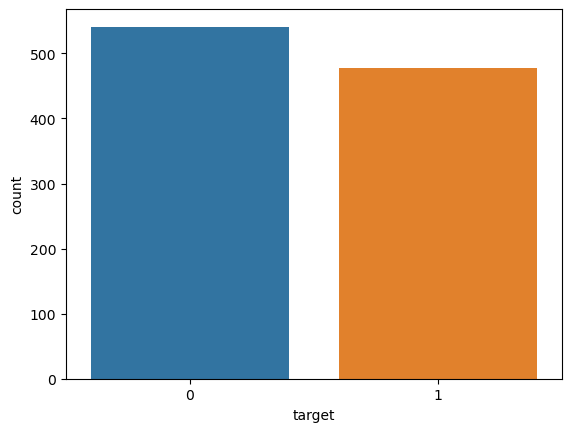

In [11]:
sns.countplot(heart_disease,x="target")

In [12]:
HD_dependent = heart_disease.iloc[:,:-1]
target = heart_disease.iloc[:,-1]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(HD_dependent, target,test_size=0.2, random_state=0, stratify=target)
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)

In [53]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0.1)
X_train_fs = variance_selector.fit_transform(X_train_scaled)
X_test_fs = variance_selector.transform(X_test_scaled)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have beenremoved, {X_train_fs.shape[1]} features remain")

0 features have beenremoved, 11 features remain


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

In [56]:
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

rf = RandomForestClassifier(random_state=0) # Use RandomForestClassifier asthe base model
rfecv = RFECV(rf, cv=3, step=2)
X_train_fs = rfecv.fit_transform(X_train_fs, y_train)
X_test_fs = rfecv.transform(X_test_fs)
print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 11


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(HD_dependent, target,test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13, metric='minkowski',p=2)
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=13)

In [116]:
y_pred= classifier.predict(X_test_scaled)

In [117]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(accuracy))
CMatrix = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix", '\n', CMatrix, '\n\n')
result = metrics.classification_report(y_test,y_pred)
print('Report:\n', result)

accuracy:0.89


Confusion Matrix 
 [[98 10]
 [13 83]] 


Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       108
           1       0.89      0.86      0.88        96

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204

